<a href="https://colab.research.google.com/github/dr-mushtaq/Machine-Learning/blob/master/Model_Selecton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Detect Overfitting and Underfitting**</p>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = DecisionTreeClassifier(max_depth=None)  # try different depths
model.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:     {test_acc:.3f}")


Training Accuracy: 1.000
Test Accuracy:     1.000


In [ ]:
| Training Accuracy | Test Accuracy  | Diagnosis    |
| ----------------- | -------------- | ------------ |
| High              | Low            | Overfitting  |
| Low               | Low            | Underfitting |
| Similar & High    | Similar & High | Good Fit ✅   |


**📈 Visualize with Learning Curves (Optional but Powerful)**

Scikit-learn has a built-in tool to plot learning curves — which is very helpful to spot overfitting and underfitting.

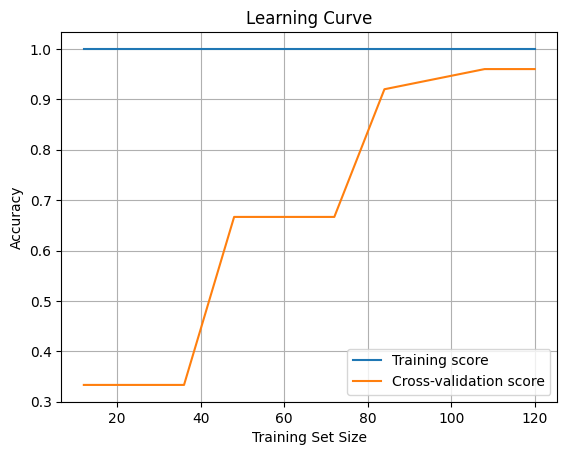

In [2]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

# Calculate mean and std
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.grid()
plt.show()


🔍 Interpretation of the Learning Curve:

Overfitting: Large gap between training and test curves

Underfitting: Both curves are low and close together

Good Fit: Curves are high and close together